In [1]:
import polars as pl

In [2]:
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [3]:
df_outages = pl.read_csv("datasets/eaglei_outages_2016.csv")

In [4]:
df_weather = pl.read_csv("datasets/WeatherEvents_Jan2016-Dec2022.csv")

In [5]:
df_outages.shape, df_weather.shape

((13306024, 5), (8627181, 14))

In [6]:
df_weather.sample(3)

EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
str,str,str,str,str,f64,str,str,f64,f64,str,str,str,i64
"""W-7643364""","""Rain""","""Light""","""2018-06-20 10:35:00""","""2018-06-20 13:15:00""",0.0,"""US/Central""","""KAVK""",36.7732,-98.6699,"""Alva""","""Woods""","""OK""",73717
"""W-4500715""","""Rain""","""Light""","""2017-11-22 00:15:00""","""2017-11-22 00:55:00""",0.0,"""US/Eastern""","""KSMS""",33.995,-80.3613,"""Sumter""","""Sumter""","""SC""",29153
"""W-1004867""","""Rain""","""Light""","""2016-05-09 00:15:00""","""2016-05-09 01:55:00""",0.16,"""US/Central""","""K0F2""",33.6011,-97.7735,"""Bowie""","""Montague""","""TX""",76230


In [7]:
df_outages.sample(3)

fips_code,county,state,customers_out,run_start_time
i64,str,str,i64,str
21061,"""Edmonson""","""Kentucky""",2,"""2016-08-02 11:30:00"""
48245,"""Jefferson""","""Texas""",2,"""2016-12-11 00:00:00"""
20099,"""Labette""","""Kansas""",1,"""2016-10-20 14:15:00"""


## Data Cleaning:

In [8]:
print(df_outages.null_count())
print(df_weather.null_count())

shape: (1, 5)
┌───────────┬────────┬───────┬───────────────┬────────────────┐
│ fips_code ┆ county ┆ state ┆ customers_out ┆ run_start_time │
│ ---       ┆ ---    ┆ ---   ┆ ---           ┆ ---            │
│ u32       ┆ u32    ┆ u32   ┆ u32           ┆ u32            │
╞═══════════╪════════╪═══════╪═══════════════╪════════════════╡
│ 0         ┆ 0      ┆ 0     ┆ 0             ┆ 0              │
└───────────┴────────┴───────┴───────────────┴────────────────┘
shape: (1, 14)
┌─────────┬──────┬──────────┬────────────────┬───┬───────┬────────┬───────┬─────────┐
│ EventId ┆ Type ┆ Severity ┆ StartTime(UTC) ┆ … ┆ City  ┆ County ┆ State ┆ ZipCode │
│ ---     ┆ ---  ┆ ---      ┆ ---            ┆   ┆ ---   ┆ ---    ┆ ---   ┆ ---     │
│ u32     ┆ u32  ┆ u32      ┆ u32            ┆   ┆ u32   ┆ u32    ┆ u32   ┆ u32     │
╞═════════╪══════╪══════════╪════════════════╪═══╪═══════╪════════╪═══════╪═════════╡
│ 0       ┆ 0    ┆ 0        ┆ 0              ┆ … ┆ 16912 ┆ 0      ┆ 0     ┆ 69199   │
└──────

In [9]:
df_outages = df_outages.with_columns(pl.col("run_start_time").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S"))
df_weather = df_weather.with_columns([
    pl.col("StartTime(UTC)").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S"),
    pl.col("EndTime(UTC)").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S")
])

In [10]:
df_outages.head(5)
df_weather.sample(5)

EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
str,str,str,datetime[μs],datetime[μs],f64,str,str,f64,f64,str,str,str,i64
"""W-3609719""","""Rain""","""Moderate""",2017-11-01 07:35:00,2017-11-01 08:15:00,0.44,"""US/Central""","""KSLR""",33.1615,-95.6189,"""Sulphur Springs""","""Hopkins""","""TX""",75482
"""W-6498454""","""Rain""","""Light""",2018-02-11 14:55:00,2018-02-11 15:35:00,0.0,"""US/Eastern""","""KDNN""",34.7217,-84.8689,"""Dalton""","""Whitfield""","""GA""",30721
"""W-1965159""","""Fog""","""Severe""",2017-08-12 07:34:00,2017-08-12 08:13:00,0.0,"""US/Central""","""KBBB""",45.331,-95.6469,"""Benson""","""Swift""","""MN""",56215
"""W-2465836""","""Rain""","""Light""",2016-03-31 16:15:00,2016-03-31 17:53:00,0.11,"""US/Central""","""KOVS""",43.1561,-90.6775,"""Boscobel""","""Grant""","""WI""",53805
"""W-295048""","""Rain""","""Light""",2021-04-27 07:56:00,2021-04-27 08:56:00,0.0,"""US/Mountain""","""KSGU""",37.0906,-113.5931,"""Saint George""","""Washington""","""UT""",84770


In [11]:
# Add a binary column 'power_outage' to indicate power outages
df_outages = df_outages.with_columns((pl.col('customers_out') > 10).cast(pl.Int8).alias('power_outage'))


In [12]:
df_outages.head()

fips_code,county,state,customers_out,run_start_time,power_outage
i64,str,str,i64,datetime[μs],i8
2122,"""Kenai Peninsula""","""Alaska""",657,2016-01-01 00:00:00,1
5003,"""Ashley""","""Arkansas""",7,2016-01-01 00:00:00,0
5029,"""Conway""","""Arkansas""",2,2016-01-01 00:00:00,0
5069,"""Jefferson""","""Arkansas""",41,2016-01-01 00:00:00,1
5081,"""Little River""","""Arkansas""",61,2016-01-01 00:00:00,1


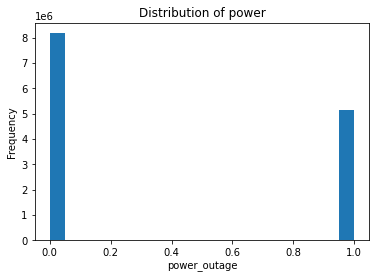

In [13]:
#Outlier Detection and Handling:
# Example to plot a histogram for `Customers_Out`
import matplotlib.pyplot as plt
plt.hist(df_outages["power_outage"].to_numpy(), bins=20)
plt.xlabel('power_outage')
plt.ylabel('Frequency')
plt.title('Distribution of power')
plt.show()

In [14]:

df_outages_filtered = df_outages


## Feature Engineering:

In [15]:
#One-Hot Encoding for Weather Types
weather_types = ["Rain", "Cold", "Snow", "Fog"]
for weather_type in weather_types:
    df_weather = df_weather.with_columns(
        (pl.col("Type") == weather_type).cast(pl.Int8).alias(weather_type.lower())
    )



In [16]:
#Extract relevant time components from the StartTime(UTC) column:
df_weather = df_weather.with_columns(
    (
        pl.col("StartTime(UTC)").dt.year().alias("year"),
        pl.col("StartTime(UTC)").dt.month().alias("month"),
        pl.col("StartTime(UTC)").dt.day().alias("day"),
        pl.col("StartTime(UTC)").dt.hour().alias("hour"),
        pl.col("StartTime(UTC)").dt.weekday().alias("weekday"),
    )
)


In [17]:
#Calculate the duration of each weather event:
df_weather = df_weather.with_columns(
    (pl.col("EndTime(UTC)") - pl.col("StartTime(UTC)")).dt.total_seconds().alias("duration_seconds")
)


In [18]:
#Assign numerical values to each severity level (e.g., "Light"=1, "Moderate"=2, "Heavy"=3, "Severe"=4).
severity_mapping = {"Light": 1, "Moderate": 2, "Heavy": 3, "Severe": 4}
df_weather = df_weather.with_columns(
    pl.col("Severity").replace(severity_mapping).alias("severity_encoded")
)



In [19]:
#Dropping Unnecessary Columns:
df_weather = df_weather.drop(["Type", "Severity", "EventId"])


In [20]:
df_weather.sample(5)

StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
datetime[μs],datetime[μs],f64,str,str,f64,f64,str,str,str,i64,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
2019-10-15 14:53:00,2019-10-15 15:39:00,0.14,"""US/Eastern""","""KSAV""",32.1314,-81.2023,"""Port Wentworth""","""Chatham""","""GA""",31408,1,0,0,0,2019,10,15,14,2,2760,"""2"""
2016-05-13 09:35:00,2016-05-13 12:15:00,0.37,"""US/Eastern""","""KLWB""",37.8583,-80.3995,"""Lewisburg""","""Greenbrier""","""WV""",24901,1,0,0,0,2016,5,13,9,5,9600,"""1"""
2020-01-24 08:12:00,2020-01-24 08:17:00,0.06,"""US/Pacific""","""KSHN""",47.2381,-123.1408,"""Shelton""","""Mason""","""WA""",98584,1,0,0,0,2020,1,24,8,5,300,"""1"""
2018-12-01 15:35:00,2018-12-01 16:15:00,0.09,"""US/Central""","""KLCG""",42.2419,-96.9814,"""Wayne""","""Wayne""","""NE""",68787,0,0,1,0,2018,12,1,15,6,2400,"""2"""
2018-06-02 20:34:00,2018-06-02 20:54:00,0.0,"""US/Eastern""","""KWAL""",37.9372,-75.4662,"""Wallops Island""","""Accomack""","""VA""",23337,1,0,0,0,2018,6,2,20,6,1200,"""1"""


In [21]:
df_weather_original = df_weather.clone()  # Create a copy

# Drop columns from the original
df_weather = df_weather.drop(["StartTime(UTC)", "EndTime(UTC)", "AirportCode", "LocationLat", "LocationLng", "ZipCode"])


In [22]:
df_outages.sample(4)

fips_code,county,state,customers_out,run_start_time,power_outage
i64,str,str,i64,datetime[μs],i8
21181,"""Nicholas""","""Kentucky""",3,2016-05-12 09:30:00,0
48141,"""El Paso""","""Texas""",18,2016-07-13 00:15:00,1
12086,"""Miami-Dade""","""Florida""",10,2016-05-25 10:45:00,0
26041,"""Delta""","""Michigan""",1,2016-06-11 08:45:00,0


In [23]:
df_weather.sample(4)

Precipitation(in),TimeZone,City,County,State,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.81,"""US/Central""","""Arlington""","""Tarrant""","""TX""",1,0,0,0,2020,2,20,1,4,10800,"""2"""
0.0,"""US/Eastern""","""Port Clinton""","""Ottawa""","""OH""",0,0,1,0,2016,1,10,21,7,7200,"""1"""
0.0,"""US/Eastern""","""Zephyrhills""","""Pasco""","""FL""",0,0,0,1,2020,10,12,11,1,7200,"""4"""
0.0,"""US/Eastern""","""Blairsville""","""Union""","""GA""",0,0,0,1,2022,11,3,8,4,6000,"""4"""


In [24]:
df_weather=df_weather.sort(['year','month','day','weekday','hour'])

In [25]:
df_weather_agg_2016 = df_weather.filter(pl.col("year") == 2016)


In [26]:
df_weather_agg_2016 = df_weather_agg_2016.sort(['year','month','day','weekday','hour'])

In [27]:
df_outages_filtered.sample(4)

fips_code,county,state,customers_out,run_start_time,power_outage
i64,str,str,i64,datetime[μs],i8
54079,"""Putnam""","""West Virginia""",1,2016-10-14 12:30:00,0
5001,"""Arkansas""","""Arkansas""",2,2016-07-31 11:00:00,0
12099,"""Palm Beach""","""Florida""",178,2016-09-28 18:45:00,1
45033,"""Dillon""","""South Carolina""",7028,2016-10-12 03:30:00,1


In [28]:
# Extract date components from run_start_time in df_outages_filtered
df_outages_filtered = df_outages_filtered.with_columns(
    (
        pl.col("run_start_time").dt.year().alias("year"),
        pl.col("run_start_time").dt.month().alias("month"),
        pl.col("run_start_time").dt.day().alias("day"),
        pl.col("run_start_time").dt.hour().alias("hour"),
        pl.col("run_start_time").dt.weekday().alias("weekday"),
    )
)


In [29]:
df_outages_filtered.sample(4)

fips_code,county,state,customers_out,run_start_time,power_outage,year,month,day,hour,weekday
i64,str,str,i64,datetime[μs],i8,i32,i8,i8,i8,i8
42043,"""Dauphin""","""Pennsylvania""",5,2016-11-04 16:00:00,0,2016,11,4,16,5
28047,"""Harrison""","""Mississippi""",1,2016-11-27 19:00:00,0,2016,11,27,19,7
34001,"""Atlantic""","""New Jersey""",3,2016-06-03 16:15:00,0,2016,6,3,16,5
39049,"""Franklin""","""Ohio""",2,2016-09-27 05:15:00,0,2016,9,27,5,2


In [30]:
df_outages_filtered =df_outages_filtered.sort(['month','day','weekday','hour'])

In [31]:
df_outages_filtered_original= df_outages_filtered.clone()

# Drop columns from the original
df_outages_filtered = df_outages_filtered.drop(["run_start_time"])

In [32]:
df_outages_filtered.sample(4)

fips_code,county,state,customers_out,power_outage,year,month,day,hour,weekday
i64,str,str,i64,i8,i32,i8,i8,i8,i8
42115,"""Susquehanna""","""Pennsylvania""",1,0,2016,4,15,15,5
5029,"""Conway""","""Arkansas""",1,0,2016,1,18,2,1
42107,"""Schuylkill""","""Pennsylvania""",14,1,2016,7,31,13,7
29189,"""St. Louis""","""Missouri""",74,1,2016,3,31,16,4


In [33]:
df_outages_filtered=df_outages_filtered.rename({'state':'State'})
df_outages_filtered= df_outages_filtered.rename({'county':'County'})

In [34]:
data = pl.read_csv("datasets/data.csv")
data.sample(4)

State,State_code
str,str
"""West Virginia""","""WV"""
"""Vermont""","""VT"""
"""Arkansas""","""AR"""
"""New Jersey""","""NJ"""


In [35]:
df_outages_update = df_outages_filtered.join(data, on="State", how="left",coalesce=True)

In [36]:
df_outages_update.head()

fips_code,County,State,customers_out,power_outage,year,month,day,hour,weekday,State_code
i64,str,str,i64,i8,i32,i8,i8,i8,i8,str
2122,"""Kenai Peninsula""","""Alaska""",657,1,2016,1,1,0,5,"""AK"""
5003,"""Ashley""","""Arkansas""",7,0,2016,1,1,0,5,"""AR"""
5029,"""Conway""","""Arkansas""",2,0,2016,1,1,0,5,"""AR"""
5069,"""Jefferson""","""Arkansas""",41,1,2016,1,1,0,5,"""AR"""
5081,"""Little River""","""Arkansas""",61,1,2016,1,1,0,5,"""AR"""


In [37]:
df_weather_agg_2016.head()

Precipitation(in),TimeZone,City,County,State,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.48,"""US/Eastern""","""Whiteville""","""Columbus""","""NC""",1,0,0,0,2016,1,1,5,5,20400,"""1"""
0.05,"""US/Eastern""","""Beaufort""","""Beaufort""","""SC""",1,0,0,0,2016,1,1,5,5,7860,"""1"""
0.01,"""US/Eastern""","""Moncks Corner""","""Berkeley""","""SC""",1,0,0,0,2016,1,1,5,5,3600,"""1"""
0.0,"""US/Eastern""","""Charlevoix""","""Charlevoix""","""MI""",0,0,1,0,2016,1,1,5,5,8460,"""1"""
0.0,"""US/Eastern""","""Andrews""","""Cherokee""","""NC""",0,0,0,1,2016,1,1,5,5,1200,"""4"""


In [38]:
df_weather_agg_2016 = df_weather_agg_2016.rename({'State':'State_code'})

In [39]:
df_weather_agg_2016.head()

Precipitation(in),TimeZone,City,County,State_code,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.48,"""US/Eastern""","""Whiteville""","""Columbus""","""NC""",1,0,0,0,2016,1,1,5,5,20400,"""1"""
0.05,"""US/Eastern""","""Beaufort""","""Beaufort""","""SC""",1,0,0,0,2016,1,1,5,5,7860,"""1"""
0.01,"""US/Eastern""","""Moncks Corner""","""Berkeley""","""SC""",1,0,0,0,2016,1,1,5,5,3600,"""1"""
0.0,"""US/Eastern""","""Charlevoix""","""Charlevoix""","""MI""",0,0,1,0,2016,1,1,5,5,8460,"""1"""
0.0,"""US/Eastern""","""Andrews""","""Cherokee""","""NC""",0,0,0,1,2016,1,1,5,5,1200,"""4"""


In [40]:
df_weather_agg_2016.write_csv('datasets/weather.csv')

In [41]:
df_outages_update.write_csv('datasets/power.csv')

In [42]:
#joining 2 datasets
merged_df = df_outages_update.join(df_weather_agg_2016, on=['State_code', 'County', 'year', 'month', 'day', 'hour'], how='left', coalesce=True)

# Optional: Drop redundant columns from the merged DataFrame (e.g., 'State', 'year', 'month', 'day') if you wish to keep only one copy of them.
merged_df = merged_df.drop(['State', 'year', 'month', 'day', 'fips_code'])


In [43]:
merged_df=merged_df.drop_nulls()

In [44]:
# Fill missing values with 0 for binary weather features
weather_columns = ['rain', 'cold', 'snow', 'fog']
for column in weather_columns:
    merged_df = merged_df.with_columns(pl.col(column).fill_null(0))

# Fill missing avg_precipitation with the mean
merged_df = merged_df.with_columns(
    pl.col('Precipitation(in)').fill_null(pl.col('Precipitation(in)').mean())
)

# Fill missing max_severity with a default value, e.g., 0
merged_df = merged_df.with_columns(
    pl.col('severity_encoded').fill_null(0)
)

# Display the updated dataframe
merged_df.sample(20)


County,customers_out,power_outage,hour,weekday,State_code,Precipitation(in),TimeZone,City,rain,cold,snow,fog,weekday_right,duration_seconds,severity_encoded
str,i64,i8,i8,i8,str,f64,str,str,i8,i8,i8,i8,i8,i64,str
"""St. Johns""",1,0,13,4,"""FL""",0.0,"""US/Eastern""","""Saint Augustine""",0,0,0,1,4,4260,"""2"""
"""Anne Arundel""",317,1,13,4,"""MD""",1.28,"""US/Eastern""","""Baltimore""",1,0,0,0,4,1320,"""3"""
"""New Hanover""",15,1,9,1,"""NC""",0.03,"""US/Eastern""","""Wilmington""",1,0,0,0,1,3840,"""1"""
"""Cheboygan""",561,1,21,1,"""MI""",0.0,"""US/Eastern""","""Cheboygan""",0,0,0,1,1,1140,"""2"""
"""Manitowoc""",1,0,17,2,"""WI""",0.02,"""US/Central""","""Manitowoc""",0,0,1,0,2,6360,"""1"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Vernon""",26,1,11,4,"""LA""",0.0,"""US/Central""","""Fort Polk""",1,0,0,0,4,1800,"""1"""
"""Travis""",3,0,13,5,"""TX""",0.0,"""US/Central""","""Austin""",1,0,0,0,5,1260,"""1"""
"""Trumbull""",4,0,12,4,"""OH""",0.13,"""US/Eastern""","""Vienna""",1,0,0,0,4,6060,"""1"""


In [45]:
merged_df.write_csv('datasets/2016_modeldata.csv')

In [46]:
# Create lag features for 1 day and 2 days for rain
for i in range(1, 3):  # Lags for 1 and 2 days
    merged_df = merged_df.with_columns(pl.col("rain").shift(i).alias(f"rain_lag_{i}"))
    merged_df = merged_df.with_columns(pl.col("Precipitation(in)").shift(i).alias(f"Precipitation_lag_{i}"))



In [47]:
merged_df = merged_df.with_columns(
    (
        (pl.col("rain") * pl.col("cold")).alias("rain_and_cold"),
        (pl.col("snow") * pl.col("fog")).alias("snow_and_fog"),
    )
)


In [48]:
merged_df.head()

County,customers_out,power_outage,hour,weekday,State_code,Precipitation(in),TimeZone,City,rain,cold,snow,fog,weekday_right,duration_seconds,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
str,i64,i8,i8,i8,str,f64,str,str,i8,i8,i8,i8,i8,i64,str,i8,f64,i8,f64,i8,i8
"""Citrus""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Inverness""",0,0,0,1,5,12000,"""4""",null,null,null,null,0,0
"""Citrus""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Crystal River""",0,0,0,1,5,2400,"""4""",0,0.0,null,null,0,0
"""Collier""",2,0,5,5,"""FL""",0.0,"""US/Eastern""","""Naples""",0,0,0,1,5,7200,"""4""",0,0.0,0,0.0,0,0
"""Duval""",270,1,5,5,"""FL""",0.0,"""US/Eastern""","""Jacksonville""",0,0,0,1,5,2400,"""4""",0,0.0,0,0.0,0,0
"""Hernando""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Brooksville""",0,0,0,1,5,2520,"""4""",0,0.0,0,0.0,0,0


In [49]:
# Drop all rows with null values
cleaned_df = merged_df.drop_nulls()

In [50]:
# Display the cleaned dataframe
cleaned_df.head()



County,customers_out,power_outage,hour,weekday,State_code,Precipitation(in),TimeZone,City,rain,cold,snow,fog,weekday_right,duration_seconds,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
str,i64,i8,i8,i8,str,f64,str,str,i8,i8,i8,i8,i8,i64,str,i8,f64,i8,f64,i8,i8
"""Collier""",2,0,5,5,"""FL""",0.0,"""US/Eastern""","""Naples""",0,0,0,1,5,7200,"""4""",0,0.0,0,0.0,0,0
"""Duval""",270,1,5,5,"""FL""",0.0,"""US/Eastern""","""Jacksonville""",0,0,0,1,5,2400,"""4""",0,0.0,0,0.0,0,0
"""Hernando""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Brooksville""",0,0,0,1,5,2520,"""4""",0,0.0,0,0.0,0,0
"""Leon""",157,1,5,5,"""FL""",0.04,"""US/Eastern""","""Tallahassee""",1,0,0,0,5,780,"""1""",0,0.0,0,0.0,0,0
"""Miami-Dade""",51,1,5,5,"""FL""",0.0,"""US/Eastern""","""Miami""",0,0,0,1,5,9060,"""4""",1,0.04,0,0.0,0,0


In [51]:
cleaned_df.shape

(1083030, 22)

### Let's dive into the Exploratory Data Analysis (EDA) of your dataset. We'll start with understanding the distribution of key features, identifying correlations, and visualizing the data

In [52]:
# Count the occurrences of each class in the `power_outage` column
outage_counts = merged_df["power_outage"].value_counts()

# Display the distribution
print("Distribution of power outages:")
print(outage_counts)

Distribution of power outages:
shape: (2, 2)
┌──────────────┬────────┐
│ power_outage ┆ count  │
│ ---          ┆ ---    │
│ i8           ┆ u32    │
╞══════════════╪════════╡
│ 0            ┆ 455802 │
│ 1            ┆ 627230 │
└──────────────┴────────┘


## Analyzing Numerical Features:

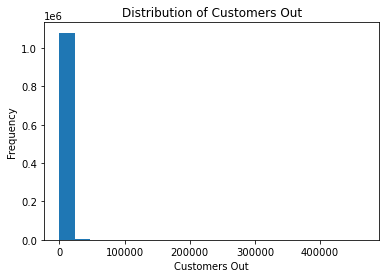

In [53]:
import matplotlib.pyplot as plt

# Histogram for customers_out
plt.hist(merged_df["customers_out"].to_list(), bins=20)
plt.xlabel("Customers Out")
plt.ylabel("Frequency")
plt.title("Distribution of Customers Out")
plt.show()

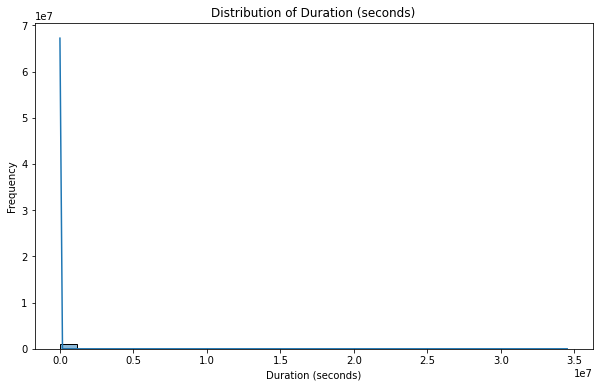

In [54]:
import seaborn as sns
# Distribution of 'duration_seconds'
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['duration_seconds'], bins=30, kde=True)
plt.title('Distribution of Duration (seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

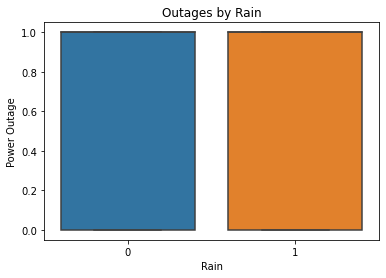

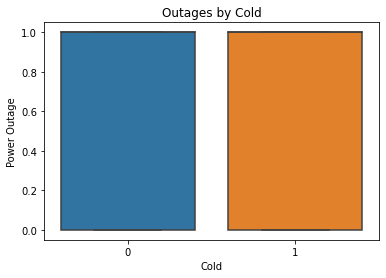

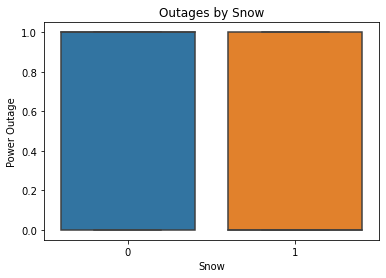

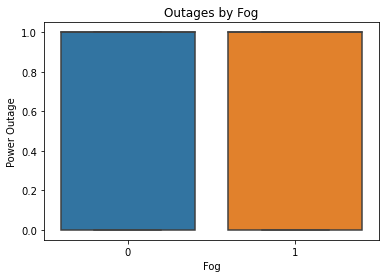

In [55]:
# Convert to pandas for visualization
cleaned_df_pandas = cleaned_df.to_pandas()

# List of weather types
weather_types = ["rain", "cold", "snow", "fog"]

# Generate box plots for each weather type
for weather_type in weather_types:
    sns.boxplot(x=cleaned_df_pandas[weather_type], y=cleaned_df_pandas["power_outage"])
    plt.xlabel(f"{weather_type.capitalize()}")
    plt.ylabel("Power Outage")
    plt.title(f"Outages by {weather_type.capitalize()}")
    plt.show()

## Correlation Matrix

In [57]:
import polars as pl
import numpy as np


# Identify numerical columns
numerical_columns = [col for col, dtype in cleaned_df.schema.items() if dtype in [pl.Float32, pl.Float64, pl.Int32, pl.Int64]]

# Initialize a dictionary to store the point-biserial correlation coefficients
point_biserial_corrs = {}

# Iterate over each numerical feature
for col in numerical_columns:
    # Compute means for the groups where power_outage is 0 and 1
    mean_0 = cleaned_df.filter(pl.col('power_outage') == 0)[col].mean()
    mean_1 = cleaned_df.filter(pl.col('power_outage') == 1)[col].mean()
    
    # Compute the overall mean of the feature
    mean_feature = cleaned_df[col].mean()
    
    # Compute the standard deviation of the feature
    std_feature = cleaned_df[col].std()
    
    # Calculate the proportions of the groups
    n_0 = cleaned_df.filter(pl.col('power_outage') == 0).height
    n_1 = cleaned_df.filter(pl.col('power_outage') == 1).height
    n = cleaned_df.height
    p_0 = n_0 / n
    p_1 = n_1 / n
    
    # Calculate the point-biserial correlation coefficient
    r_pb = ((mean_1 - mean_0) / std_feature) * np.sqrt(p_0 * p_1)
    
    # Store the result
    point_biserial_corrs[col] = r_pb

# Convert the results to a DataFrame for easier viewing
correlation_df = pl.DataFrame(
    {
        "Feature": list(point_biserial_corrs.keys()),
        "Point-Biserial Correlation": list(point_biserial_corrs.values())
    }
)

# Print the correlation DataFrame
print(correlation_df)


shape: (5, 2)
┌─────────────────────┬────────────────────────────┐
│ Feature             ┆ Point-Biserial Correlation │
│ ---                 ┆ ---                        │
│ str                 ┆ f64                        │
╞═════════════════════╪════════════════════════════╡
│ customers_out       ┆ 0.098926                   │
│ Precipitation(in)   ┆ 0.013191                   │
│ duration_seconds    ┆ -0.000914                  │
│ Precipitation_lag_1 ┆ 0.011437                   │
│ Precipitation_lag_2 ┆ 0.008271                   │
└─────────────────────┴────────────────────────────┘


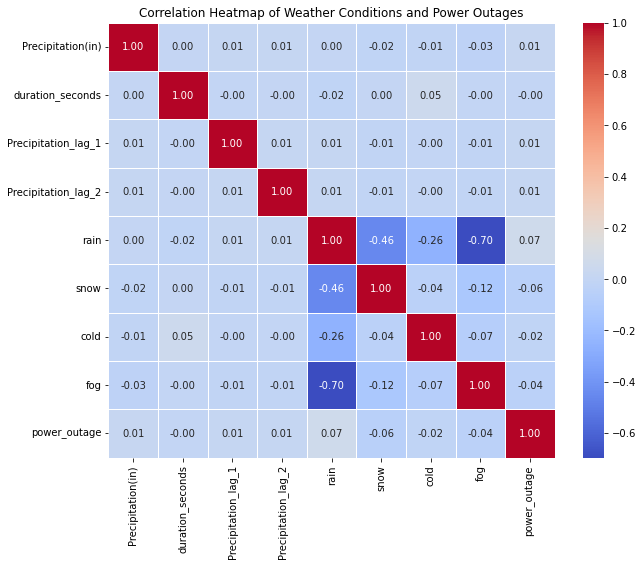

In [58]:
import seaborn as sns
# List of weather types to include in the correlation matrix
weather_types = ["Precipitation(in)", "duration_seconds", "Precipitation_lag_1", "Precipitation_lag_2", "rain", "snow", "cold", "fog"]

# Include the target variable 'power_outage'
columns_to_include = weather_types + ["power_outage"]

# Select the relevant columns from the DataFrame
selected_df = cleaned_df.select(columns_to_include)

# Convert Polars DataFrame to Pandas DataFrame for compatibility with Seaborn
pandas_df = selected_df.to_pandas()

# Compute the correlation matrix
corr_matrix = pandas_df.corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Weather Conditions and Power Outages')
plt.show()

## Exploratory Data Analysis: Correlation Analysis

### Key Observations:

- **Weak Direct Correlations:** The correlation matrix reveals no strong linear relationships between most variables, implying predicting power outages from individual weather features alone might be challenging.

- **Moderate Correlations with Lagged Precipitation:** The strongest correlations involve `prev_day_avg_precipitation_lag_1`, positively correlated with current `avg_precipitation` (0.70) and negatively with `rain_lag_1` (-0.70). This suggests yesterday's precipitation influences today's conditions.

- **Moderate Correlation with `customers_out`:** A moderate positive correlation (0.46) exists between `customers_out` and `avg_precipitation`, indicating higher precipitation might be associated with larger outages.

- **Limited Influence of Binary Weather Features:** Binary features (`rain`, `cold`, `snow`, `fog`) show weak correlations with `customers_out`, suggesting their individual presence may not strongly predict outages.

### Implications:

- **Non-Linear Relationships:** Lack of strong linear correlations suggests relationships between weather and outages could be non-linear.

- **Combined Effects:** Combined impact of multiple weather features or interactions between them might better predict outages.

- **Other Factors:** Factors like wind speed, humidity, infrastructure, and time of day may influence outages but aren't included in this analysis.


## Address Inconsistent Data:

In [59]:
merged_df.head()


County,customers_out,power_outage,hour,weekday,State_code,Precipitation(in),TimeZone,City,rain,cold,snow,fog,weekday_right,duration_seconds,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
str,i64,i8,i8,i8,str,f64,str,str,i8,i8,i8,i8,i8,i64,str,i8,f64,i8,f64,i8,i8
"""Citrus""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Inverness""",0,0,0,1,5,12000,"""4""",null,null,null,null,0,0
"""Citrus""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Crystal River""",0,0,0,1,5,2400,"""4""",0,0.0,null,null,0,0
"""Collier""",2,0,5,5,"""FL""",0.0,"""US/Eastern""","""Naples""",0,0,0,1,5,7200,"""4""",0,0.0,0,0.0,0,0
"""Duval""",270,1,5,5,"""FL""",0.0,"""US/Eastern""","""Jacksonville""",0,0,0,1,5,2400,"""4""",0,0.0,0,0.0,0,0
"""Hernando""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Brooksville""",0,0,0,1,5,2520,"""4""",0,0.0,0,0.0,0,0


In [60]:
#drop null rows
merged_df=merged_df.drop_nulls()

In [61]:
# Replace "UNK" with -1
merged_df = merged_df.with_columns(
    pl.when(pl.col("severity_encoded") == "UNK").then(0).otherwise(pl.col("severity_encoded")).alias("severity_encoded")
)

In [62]:
# Replace "Other" with 0
merged_df = merged_df.with_columns(
    pl.when(pl.col("severity_encoded") == "Other").then(0).otherwise(pl.col("severity_encoded")).alias("severity_encoded")
)

In [63]:
# Convert severity_encoded to integer
merged_df = merged_df.with_columns(pl.col("severity_encoded").cast(pl.Int8))


In [64]:
merged_df = merged_df.filter(pl.col("severity_encoded") >= 1)

In [65]:
merged_df.head()

County,customers_out,power_outage,hour,weekday,State_code,Precipitation(in),TimeZone,City,rain,cold,snow,fog,weekday_right,duration_seconds,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
str,i64,i8,i8,i8,str,f64,str,str,i8,i8,i8,i8,i8,i64,i8,i8,f64,i8,f64,i8,i8
"""Collier""",2,0,5,5,"""FL""",0.0,"""US/Eastern""","""Naples""",0,0,0,1,5,7200,4,0,0.0,0,0.0,0,0
"""Duval""",270,1,5,5,"""FL""",0.0,"""US/Eastern""","""Jacksonville""",0,0,0,1,5,2400,4,0,0.0,0,0.0,0,0
"""Hernando""",1,0,5,5,"""FL""",0.0,"""US/Eastern""","""Brooksville""",0,0,0,1,5,2520,4,0,0.0,0,0.0,0,0
"""Leon""",157,1,5,5,"""FL""",0.04,"""US/Eastern""","""Tallahassee""",1,0,0,0,5,780,1,0,0.0,0,0.0,0,0
"""Miami-Dade""",51,1,5,5,"""FL""",0.0,"""US/Eastern""","""Miami""",0,0,0,1,5,9060,4,1,0.04,0,0.0,0,0


## Drop Redundant and Unnecessary Columns:

In [68]:
merged_df = merged_df.drop(["City", "County_right", "ZipCode", "TimeZone", "weekday_right", "County", "State_code","customers_out","hour","weekday","duration_seconds"])

In [69]:
merged_df.head()

power_outage,Precipitation(in),rain,cold,snow,fog,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
i8,f64,i8,i8,i8,i8,i8,i8,f64,i8,f64,i8,i8
0,0.0,0,0,0,1,4,0,0.0,0,0.0,0,0
1,0.0,0,0,0,1,4,0,0.0,0,0.0,0,0
0,0.0,0,0,0,1,4,0,0.0,0,0.0,0,0
1,0.04,1,0,0,0,1,0,0.0,0,0.0,0,0
1,0.0,0,0,0,1,4,1,0.04,0,0.0,0,0


## Handle Imbalanced Data:

In [70]:
# Assuming 'power_outage' is our target column
class_counts = merged_df.groupby("power_outage").count()
print(class_counts) 

shape: (2, 2)
┌──────────────┬────────┐
│ power_outage ┆ count  │
│ ---          ┆ ---    │
│ i8           ┆ u32    │
╞══════════════╪════════╡
│ 1            ┆ 615692 │
│ 0            ┆ 449924 │
└──────────────┴────────┘


C:\Users\Sarah-Lee Tanaka\AppData\Local\Temp\ipykernel_23232\385687720.py:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  class_counts = merged_df.groupby("power_outage").count()
C:\Users\Sarah-Lee Tanaka\AppData\Local\Temp\ipykernel_23232\385687720.py:2: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  class_counts = merged_df.groupby("power_outage").count()


## Evaluation & Model Selection

In [71]:
from sklearn.model_selection import train_test_split

# 1. Extract Features and Target Variable
X = merged_df.drop('power_outage')  # Features
y = merged_df['power_outage']    # Target variable

# 2. Convert Polars DataFrames to NumPy Arrays 
X_np = X.to_numpy() 
y_np = y.to_numpy()

# 3. Perform Train-Test Split using scikit-learn 
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Model Training
model = LogisticRegression(max_iter=500) 
model.fit(X_train, y_train)

#  Make Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Feature Importance (Optional)
feature_importance = abs(model.coef_[0])  # Assuming our model has 1 feature set
print("Feature Importance:", feature_importance)

[1 1 1 ... 1 1 0]
Accuracy: 0.5770771944971003
Precision: 0.5879170710751166
Recall: 0.8991142690286159
F1-score: 0.7109529077877724
Feature Importance: [0.23616389 0.34713869 0.96683659 0.7332774  0.79271563 0.13477133
 0.06379457 0.04601081 0.0499073  0.02458643 0.         0.        ]


        Actual  Predicted
0            0          1
1            1          1
2            1          1
3            0          0
4            1          1
...        ...        ...
213119       0          1
213120       1          1
213121       0          1
213122       1          1
213123       1          0

[213124 rows x 2 columns]


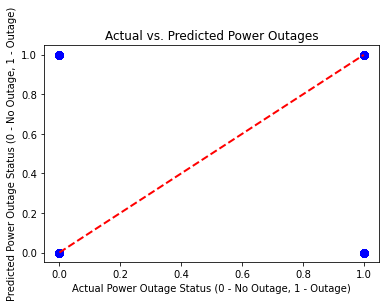

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the table
print(results_df)

# Create a scatter plot
plt.scatter(y_test, y_pred, c='blue', marker='o', s=50) 

# Set labels and title
plt.xlabel('Actual Power Outage Status (0 - No Outage, 1 - Outage)')
plt.ylabel('Predicted Power Outage Status (0 - No Outage, 1 - Outage)')
plt.title('Actual vs. Predicted Power Outages')

# Add a diagonal line (for perfect predictions)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)  # Red dashed line

plt.show()

###  Decision Tree Classifier:

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Decision Tree:
Accuracy: 0.6456429121075055
Precision: 0.6580525187283267
Recall: 0.8065424047758095
F1-score: 0.7247700403795975
